<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [142]:
df = pd.read_csv("/content/water_potability.csv")

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [144]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [146]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [147]:
X = df.drop('Potability',axis=1)
y = df['Potability']

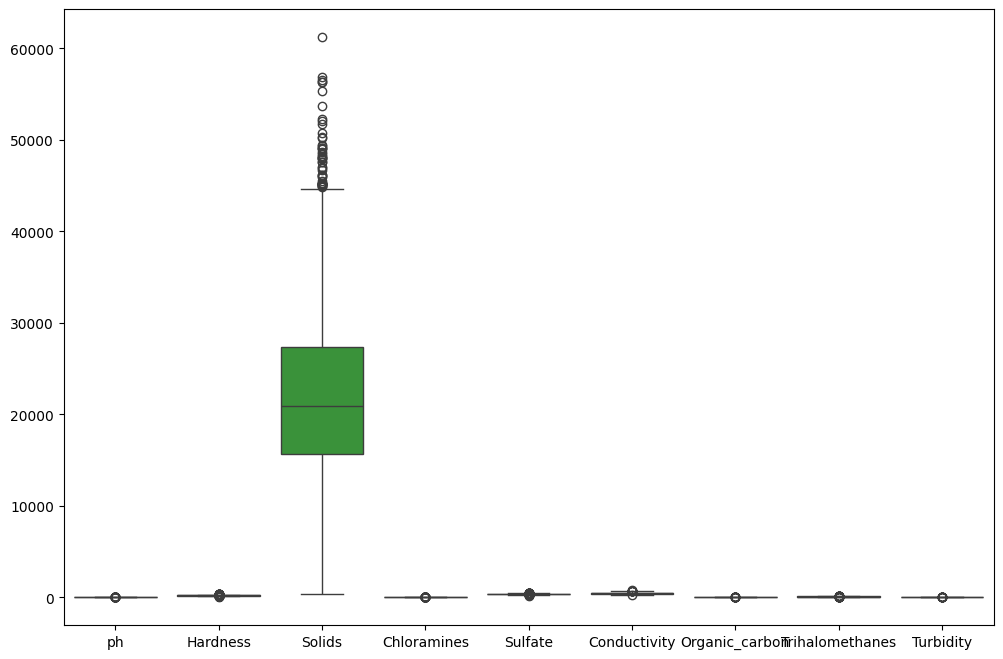

In [148]:
plt.figure(figsize=(12,8))
sns.boxplot(data=X)
plt.show()

In [149]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [150]:
numeric_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

In [151]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [152]:
num_transformer = Pipeline (
    steps = [
        ('imputer',SimpleImputer(strategy='median')),

        ('scaler', RobustScaler()),

    ]
)

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [154]:
# base learner
lgr = LogisticRegression()
knn = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
svc_cls = SVC(random_state=42)


In [155]:
#voting regressor

voting_cls = VotingClassifier(
    estimators=[
        ('rf', rf_clf),#randomforest
        ('gb', gb_clf), # Gradientboosting
        ('xgb', xgb_clf) # Xgbclassifier
    ]
)

In [156]:
#stacking
stacking_cls = StackingClassifier(
    estimators=[
     ('lgr', lgr),
    ('rf', rf_clf),
    ('gb', gb_clf),
    ('xgb', xgb_clf)
])

In [157]:
model_train = {
    'Logistic Regression': lgr,
    'KNN': knn,
    'Random Forest': rf_clf,
    'Gradient Boosting': gb_clf,
    'XGBoost': xgb_clf,
    'SVC': svc_cls,
    'Voting Classifier': voting_cls,
    'Stacking Classifier': stacking_cls

}

In [158]:
results = []
for name, model in model_train.items():
  pipe = Pipeline(
      [
          ('numercal_pipe',num_transformer),
          ('model',model)
      ]
  )

  pipe.fit(X_train,y_train)

  y_pred = pipe.predict(X_test)

  accuracy = accuracy_score(y_test,y_pred)
  cls_rep = classification_report(y_test,y_pred)
  cnf_mat = confusion_matrix(y_test,y_pred)
  results.append(
      {
          'Model Name': name,
          'Accuracy': accuracy,
          'Classification Report': cls_rep,
          'Confusion Matrix': cnf_mat
      }
  )

  result_df = pd.DataFrame(results).sort_values("Accuracy", ascending=False)
print(result_df)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


            Model Name  Accuracy  \
5                  SVC  0.670330   
6    Voting Classifier  0.666667   
2        Random Forest  0.664225   
7  Stacking Classifier  0.663004   
3    Gradient Boosting  0.660562   
4              XGBoost  0.632479   
1                  KNN  0.611722   
0  Logistic Regression  0.609280   

                               Classification Report          Confusion Matrix  
5                precision    recall  f1-score   ...    [[459, 40], [230, 90]]  
6                precision    recall  f1-score   ...    [[449, 50], [223, 97]]  
2                precision    recall  f1-score   ...   [[440, 59], [216, 104]]  
7                precision    recall  f1-score   ...    [[447, 52], [224, 96]]  
3                precision    recall  f1-score   ...    [[469, 30], [248, 72]]  
4                precision    recall  f1-score   ...  [[389, 110], [191, 129]]  
1                precision    recall  f1-score   ...  [[391, 108], [210, 110]]  
0                precision 